In [75]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from sqlalchemy import create_engine
import warnings
import seaborn as sns
from statistics import mode
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV

warnings.filterwarnings('ignore')
sns.set(style = 'whitegrid')

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

hp1 = pd.read_sql_query('select * from houseprices',con=engine)

engine.dispose()

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Data Cleaning and Exploration

In [4]:
hp1.describe(include = 'all')

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremodadd,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,firstflrsf,secondflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,threessnporch,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460,1460,1460,1452,1452.000000,1460,1460,1460,1423,1423,1422,1423,1460.000000,1422,1460.000000,1460.000000,1460.000000,1460,1460,1460,1459,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460.000000,1460,1460.000000,770,1379,1379.000000,1379,1460.000000,1460.000000,1379,1379,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,5,3,25,9,8,5,8,NaN,NaN,NaN,NaN,6,8,15,16,4,NaN,4,5,6,4,4,4,6,NaN,6,NaN,NaN,NaN,6,5,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,5,6,NaN,3,NaN,NaN,5,5,3,NaN,NaN,NaN,NaN,NaN,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,None,NaN,TA,TA,PConc,TA,TA,No,Unf,NaN,Unf,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,Gd,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,NaN,NaN,NaN,NaN,1141,1434,515,504,864,NaN,906,1282,647,649,1311,953,430,NaN,1256,NaN,NaN,NaN,1428,741,1365,1334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735,NaN,1360,NaN,380,870,NaN,605,NaN,NaN,1311,1326,1340,NaN,NaN,NaN,NaN,NaN,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.099315,5.575342,1971.267808,1984.865753,NaN,NaN,NaN,NaN,NaN,103.685262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,443.639726,NaN,46.549315,567.240411,1057.429452,NaN,NaN,NaN,NaN,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,NaN,6.517808,NaN,0.613014,NaN,NaN,1978.506164,NaN,1.767123,472.980137,NaN,NaN,NaN,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.382997,1.112799,30.202904,20.645407,NaN,NaN,NaN,NaN,NaN,181.066207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,456.098091,NaN,161.319273,441.866955,438.705324,NaN,NaN,NaN,NaN,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,NaN,1.625393,NaN,0.644666,NaN,NaN,24.689725,NaN,0.747315,213.804841,NaN,NaN,NaN,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,0.000000,NaN,NaN,1900.0

In [5]:
x= hp1.isnull().sum()*100/hp1.isnull().count()
print (x)

id                0.000000
mssubclass        0.000000
mszoning          0.000000
lotfrontage      17.739726
lotarea           0.000000
street            0.000000
alley            93.767123
lotshape          0.000000
landcontour       0.000000
utilities         0.000000
lotconfig         0.000000
landslope         0.000000
neighborhood      0.000000
condition1        0.000000
condition2        0.000000
bldgtype          0.000000
housestyle        0.000000
overallqual       0.000000
overallcond       0.000000
yearbuilt         0.000000
yearremodadd      0.000000
roofstyle         0.000000
roofmatl          0.000000
exterior1st       0.000000
exterior2nd       0.000000
masvnrtype        0.547945
masvnrarea        0.547945
exterqual         0.000000
extercond         0.000000
foundation        0.000000
bsmtqual          2.534247
bsmtcond          2.534247
bsmtexposure      2.602740
bsmtfintype1      2.534247
bsmtfinsf1        0.000000
bsmtfintype2      2.602740
bsmtfinsf2        0.000000
b

In [6]:
hp1.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremodadd,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,firstflrsf,secondflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,threessnporch,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000


In [7]:
print (hp1['mszoning'].unique())
print (hp1['alley'].unique())

['RL' 'RM' 'C (all)' 'FV' 'RH']
[None 'Grvl' 'Pave']


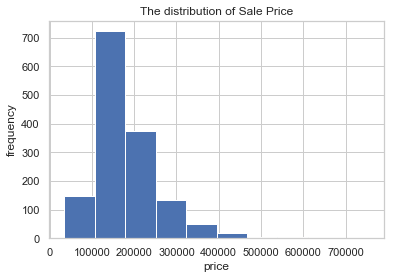

In [8]:
plt.hist(hp1.saleprice)
plt.title("The distribution of Sale Price")
plt.xlabel("price")
plt.ylabel("frequency")
plt.show()

Sale price is not normally distributed, it is skewed to the left. Most houses sold for $150,000 - $200,000.

In [9]:
hp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
id               1460 non-null int64
mssubclass       1460 non-null int64
mszoning         1460 non-null object
lotfrontage      1201 non-null float64
lotarea          1460 non-null int64
street           1460 non-null object
alley            91 non-null object
lotshape         1460 non-null object
landcontour      1460 non-null object
utilities        1460 non-null object
lotconfig        1460 non-null object
landslope        1460 non-null object
neighborhood     1460 non-null object
condition1       1460 non-null object
condition2       1460 non-null object
bldgtype         1460 non-null object
housestyle       1460 non-null object
overallqual      1460 non-null int64
overallcond      1460 non-null int64
yearbuilt        1460 non-null int64
yearremodadd     1460 non-null int64
roofstyle        1460 non-null object
roofmatl         1460 non-null object
exterior1st      1460 non-n

In [10]:
hp1.select_dtypes(include=['object']).columns

Index(['mszoning', 'street', 'alley', 'lotshape', 'landcontour', 'utilities',
       'lotconfig', 'landslope', 'neighborhood', 'condition1', 'condition2',
       'bldgtype', 'housestyle', 'roofstyle', 'roofmatl', 'exterior1st',
       'exterior2nd', 'masvnrtype', 'exterqual', 'extercond', 'foundation',
       'bsmtqual', 'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfintype2',
       'heating', 'heatingqc', 'centralair', 'electrical', 'kitchenqual',
       'functional', 'fireplacequ', 'garagetype', 'garagefinish', 'garagequal',
       'garagecond', 'paveddrive', 'poolqc', 'fence', 'miscfeature',
       'saletype', 'salecondition'],
      dtype='object')

In [11]:
hp1.select_dtypes(exclude=['object']).columns

Index(['id', 'mssubclass', 'lotfrontage', 'lotarea', 'overallqual',
       'overallcond', 'yearbuilt', 'yearremodadd', 'masvnrarea', 'bsmtfinsf1',
       'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'firstflrsf', 'secondflrsf',
       'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath',
       'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'totrmsabvgrd',
       'fireplaces', 'garageyrblt', 'garagecars', 'garagearea', 'wooddecksf',
       'openporchsf', 'enclosedporch', 'threessnporch', 'screenporch',
       'poolarea', 'miscval', 'mosold', 'yrsold', 'saleprice'],
      dtype='object')

In [12]:
hp = hp1.copy()

In [13]:
for col in hp:
    if hp[col].dtype == 'object':
        hp[col]=hp[col].fillna(hp[col].mode())
    else:
        hp[col] = hp[col].fillna(hp[col].mean())

In [14]:
x= hp.isnull().sum()*100/hp.isnull().count()
print (x)

id                0.000000
mssubclass        0.000000
mszoning          0.000000
lotfrontage       0.000000
lotarea           0.000000
street            0.000000
alley            93.698630
lotshape          0.000000
landcontour       0.000000
utilities         0.000000
lotconfig         0.000000
landslope         0.000000
neighborhood      0.000000
condition1        0.000000
condition2        0.000000
bldgtype          0.000000
housestyle        0.000000
overallqual       0.000000
overallcond       0.000000
yearbuilt         0.000000
yearremodadd      0.000000
roofstyle         0.000000
roofmatl          0.000000
exterior1st       0.000000
exterior2nd       0.000000
masvnrtype        0.547945
masvnrarea        0.000000
exterqual         0.000000
extercond         0.000000
foundation        0.000000
bsmtqual          2.534247
bsmtcond          2.534247
bsmtexposure      2.602740
bsmtfintype1      2.534247
bsmtfinsf1        0.000000
bsmtfintype2      2.602740
bsmtfinsf2        0.000000
b

In [15]:
for column_name in hp.columns:
    print("Unique values in column {} are: {}".format(column_name, hp[column_name].unique()))

Unique values in column id are: [   1    2    3 ... 1458 1459 1460]
Unique values in column mssubclass are: [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
Unique values in column mszoning are: ['RL' 'RM' 'C (all)' 'FV' 'RH']
Unique values in column lotfrontage are: [ 65.          80.          68.          60.          84.
  85.          75.          70.04995837  51.          50.
  70.          91.          72.          66.         101.
  57.          44.         110.          98.          47.
 108.         112.          74.         115.          61.
  48.          33.          52.         100.          24.
  89.          63.          76.          81.          95.
  69.          21.          32.          78.         121.
 122.          40.         105.          73.          77.
  64.          94.          34.          90.          55.
  88.          82.          71.         120.         107.
  92.         134.          62.          86.         141.
  97.          54.     

 220 119 165  40]
Unique values in column poolarea are: [  0 512 648 576 555 480 519 738]
Unique values in column poolqc are: ['Gd' nan 'Ex' 'Fa']
Unique values in column fence are: ['MnPrv' nan 'GdWo' 'GdPrv' 'MnWw']
Unique values in column miscfeature are: ['Shed' nan 'Gar2' 'Othr' 'TenC']
Unique values in column miscval are: [    0   700   350   500   400   480   450 15500  1200   800  2000   600
  3500  1300    54   620   560  1400  8300  1150  2500]
Unique values in column mosold are: [ 2  5  9 12 10  8 11  4  1  7  3  6]
Unique values in column yrsold are: [2008 2007 2006 2009 2010]
Unique values in column saletype are: ['WD' 'New' 'COD' 'ConLD' 'ConLI' 'CWD' 'ConLw' 'Con' 'Oth']
Unique values in column salecondition are: ['Normal' 'Abnorml' 'Partial' 'AdjLand' 'Alloca' 'Family']
Unique values in column saleprice are: [208500 181500 223500 140000 250000 143000 307000 200000 129900 118000
 129500 345000 144000 279500 157000 132000 149000  90000 159000 139000
 325300 139400 230000 

In [16]:
for col in hp:
    if (hp[col].isnull().sum()*100/hp[col].isnull().count())>10.00:
        hp.drop([col], axis=1, inplace=True)        
    else:
        hp.dropna(subset=[col])

In [17]:
hp.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremodadd,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,firstflrsf,secondflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,threessnporch,screenporch,poolarea,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [18]:
hpp2= hp.copy()

In [19]:
hpp4 = pd.get_dummies(data=hpp2, columns=hpp2.select_dtypes(include='object').columns, drop_first=True)
hpp4.head()

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,bsmtfinsf2,bsmtunfsf,totalbsmtsf,firstflrsf,secondflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,totrmsabvgrd,fireplaces,garageyrblt,garagecars,garagearea,wooddecksf,openporchsf,enclosedporch,threessnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice,mszoning_FV,mszoning_RH,mszoning_RL,mszoning_RM,street_Pave,lotshape_IR2,lotshape_IR3,lotshape_Reg,landcontour_HLS,landcontour_Low,landcontour_Lvl,utilities_NoSeWa,lotconfig_CulDSac,lotconfig_FR2,lotconfig_FR3,lotconfig_Inside,landslope_Mod,landslope_Sev,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_IDOTRR,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,condition1_Feedr,condition1_Norm,condition1_PosA,condition1_PosN,condition1_RRAe,condition1_RRAn,condition1_RRNe,condition1_RRNn,condition2_Feedr,condition2_Norm,condition2_PosA,condition2_PosN,condition2_RRAe,condition2_RRAn,condition2_RRNn,bldgtype_2fmCon,bldgtype_Duplex,bldgtype_Twnhs,bldgtype_TwnhsE,housestyle_1.5Unf,housestyle_1Story,housestyle_2.5Fin,housestyle_2.5Unf,housestyle_2Story,housestyle_SFoyer,housestyle_SLvl,roofstyle_Gable,roofstyle_Gambrel,roofstyle_Hip,roofstyle_Mansard,roofstyle_Shed,roofmatl_CompShg,roofmatl_Membran,roofmatl_Metal,roofmatl_Roll,roofmatl_Tar&Grv,roofmatl_WdShake,roofmatl_WdShngl,exterior1st_AsphShn,exterior1st_BrkComm,exterior1st_BrkFace,exterior1st_CBlock,exterior1st_CemntBd,exterior1st_HdBoard,exterior1st_ImStucc,exterior1st_MetalSd,exterior1st_Plywood,exterior1st_Stone,exterior1st_Stucco,exterior1st_VinylSd,exterior1st_Wd Sdng,exterior1st_WdShing,exterior2nd_AsphShn,exterior2nd_Brk Cmn,exterior2nd_BrkFace,exterior2nd_CBlock,exterior2nd_CmentBd,exterior2nd_HdBoard,exterior2nd_ImStucc,exterior2nd_MetalSd,exterior2nd_Other,exterior2nd_Plywood,exterior2nd_Stone,exterior2nd_Stucco,exterior2nd_VinylSd,exterior2nd_Wd Sdng,exterior2nd_Wd Shng,masvnrtype_BrkFace,masvnrtype_None,masvnrtype_Stone,exterqual_Fa,exterqual_Gd,exterqual_TA,extercond_Fa,extercond_Gd,extercond_Po,extercond_TA,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,bsmtqual_Fa,bsmtqual_Gd,bsmtqual_TA,bsmtcond_Gd,bsmtcond_Po,bsmtcond_TA,bsmtexposure_Gd,bsmtexposure_Mn,bsmtexposure_No,bsmtfintype1_BLQ,bsmtfintype1_GLQ,bsmtfintype1_LwQ,bsmtfintype1_Rec,bsmtfintype1_Unf,bsmtfintype2_BLQ,bsmtfintype2_GLQ,bsmtfintype2_LwQ,bsmtfintype2_Rec,bsmtfintype2_Unf,heating_GasA,heating_GasW,heating_Grav,heating_OthW,heating_Wall,heatingqc_Fa,heatingqc_Gd,heatingqc_Po,heatingqc_TA,centralair_Y,electrical_FuseF,electrical_FuseP,electrical_Mix,electrical_SBrkr,kitchenqual_Fa,kitchenqual_Gd,kitchenqual_TA,functional_Maj2,functional_Min1,functional_Min2,functional_Mod,functional_Sev,functional_Typ,garagetype_Attchd,garagetype_Basment,garagetype_BuiltIn,garagetype_CarPort,garagetype_Detchd,garagefinish_RFn,garagefinish_Unf,garagequal_Fa,garagequal_Gd,garagequal_Po,garagequal_TA,garagecond_Fa,garagecond_Gd,garagecond_Po,garagecond_TA,paveddrive_P,paveddrive_Y,saletype_CWD,saletype_Con,saletype_ConLD,saletype_ConLI,saletype_ConLw,saletype_New,saletype_Oth,saletype_WD,salecondition_AdjLand,salecondition_Alloca,salecondition_Family,salecondition_Normal,salecondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0

In [20]:
x = list (hpp4.columns)
x

['id',
 'mssubclass',
 'lotfrontage',
 'lotarea',
 'overallqual',
 'overallcond',
 'yearbuilt',
 'yearremodadd',
 'masvnrarea',
 'bsmtfinsf1',
 'bsmtfinsf2',
 'bsmtunfsf',
 'totalbsmtsf',
 'firstflrsf',
 'secondflrsf',
 'lowqualfinsf',
 'grlivarea',
 'bsmtfullbath',
 'bsmthalfbath',
 'fullbath',
 'halfbath',
 'bedroomabvgr',
 'kitchenabvgr',
 'totrmsabvgrd',
 'fireplaces',
 'garageyrblt',
 'garagecars',
 'garagearea',
 'wooddecksf',
 'openporchsf',
 'enclosedporch',
 'threessnporch',
 'screenporch',
 'poolarea',
 'miscval',
 'mosold',
 'yrsold',
 'saleprice',
 'mszoning_FV',
 'mszoning_RH',
 'mszoning_RL',
 'mszoning_RM',
 'street_Pave',
 'lotshape_IR2',
 'lotshape_IR3',
 'lotshape_Reg',
 'landcontour_HLS',
 'landcontour_Low',
 'landcontour_Lvl',
 'utilities_NoSeWa',
 'lotconfig_CulDSac',
 'lotconfig_FR2',
 'lotconfig_FR3',
 'lotconfig_Inside',
 'landslope_Mod',
 'landslope_Sev',
 'neighborhood_Blueste',
 'neighborhood_BrDale',
 'neighborhood_BrkSide',
 'neighborhood_ClearCr',
 'neighb

In [22]:
corr= hpp4.corr()
print (corr)

                             id  mssubclass   lotfrontage   lotarea  \
id                     1.000000    0.011156 -9.600822e-03 -0.033226   
mssubclass             0.011156    1.000000 -3.570559e-01 -0.139781   
lotfrontage           -0.009601   -0.357056  1.000000e+00  0.306795   
lotarea               -0.033226   -0.139781  3.067946e-01  1.000000   
overallqual           -0.028365    0.032628  2.341962e-01  0.105806   
overallcond            0.012609   -0.059316 -5.282010e-02 -0.005636   
yearbuilt             -0.012713    0.027850  1.175980e-01  0.014228   
yearremodadd          -0.021998    0.040581  8.274589e-02  0.013788   
masvnrarea            -0.050199    0.022895  1.792835e-01  0.103960   
bsmtfinsf1            -0.005024   -0.069836  2.158284e-01  0.214103   
bsmtfinsf2            -0.005968   -0.065649  4.333957e-02  0.111170   
bsmtunfsf             -0.007940   -0.140759  1.221556e-01 -0.002618   
totalbsmtsf           -0.015415   -0.238518  3.633577e-01  0.260833   
firstf

In [23]:
corr = corr.sort_values('saleprice')

In [48]:
cols = corr['saleprice'][corr['saleprice'].values > 0.55].index.values

In [49]:
cols

array(['fullbath', 'firstflrsf', 'totalbsmtsf', 'garagearea',
       'garagecars', 'grlivarea', 'overallqual', 'saleprice'],
      dtype=object)

In [50]:
corr_col = list(cols[:10])
corr_col

['fullbath',
 'firstflrsf',
 'totalbsmtsf',
 'garagearea',
 'garagecars',
 'grlivarea',
 'overallqual',
 'saleprice']

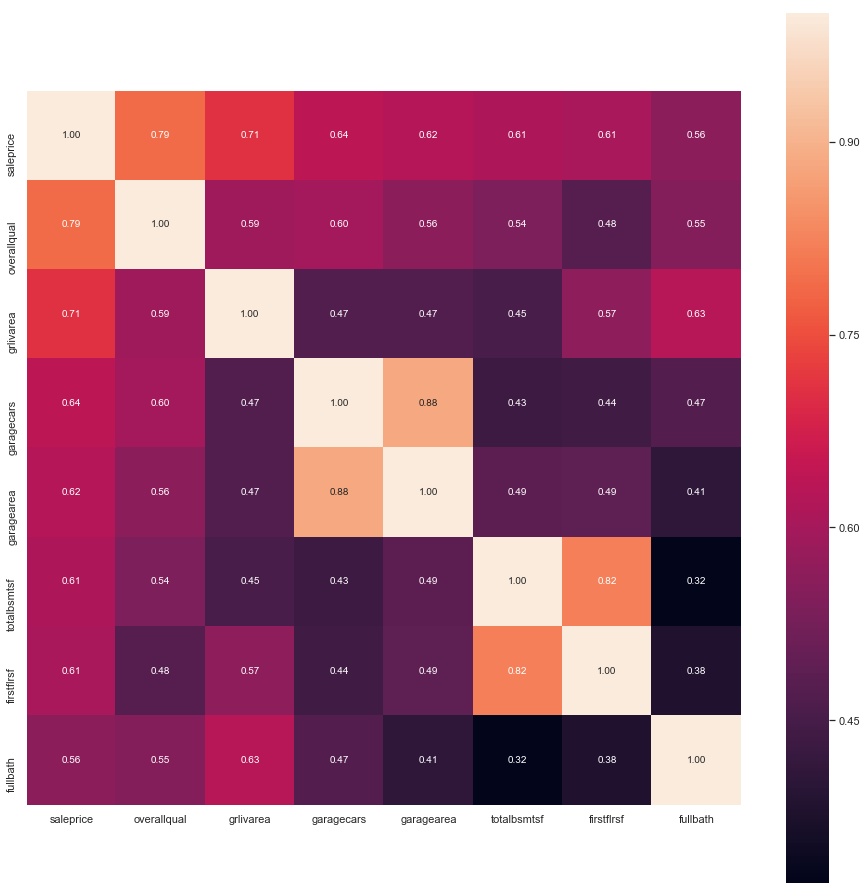

In [55]:
heatMapCols=np.append(cols[0:7], np.array(['saleprice']))
cm = np.corrcoef(hpp4[heatMapCols[::-1]].T)
plt.figure(figsize=(16,16))
sns.set(font_scale=1)
with sns.axes_style("white"):
    sns.heatmap(cm,yticklabels=heatMapCols[::-1],xticklabels=heatMapCols[::-1],fmt='.2f',annot_kws={'size':10},annot=True,square=True,cmap=None)

# Feature Engineering 

In [57]:
hpp4['area']= hpp4['firstflrsf']+ hpp4['totalbsmtsf']

In [58]:
hpp4['garage'] = hpp4['garagearea'] + hpp4['garagecars']

In [59]:
hpp4['area_qual'] = hpp4['area']*hpp4['overallqual']

In [62]:
most_corr = np.abs(hpp4[hpp4.select_dtypes(['int64', 'float64']).columns].iloc[:,1:].corr().loc[:,"saleprice"]).sort_values(ascending=False)
most_corr[0:11]

saleprice      1.000000
overallqual    0.790982
area_qual      0.780269
grlivarea      0.708624
garagecars     0.640409
area           0.639368
garage         0.623745
garagearea     0.623431
totalbsmtsf    0.613581
firstflrsf     0.605852
fullbath       0.560664
Name: saleprice, dtype: float64

# Splitting the data set 

In [99]:
# Y is the target variable which is the sale price
Y1 = hpp4['saleprice']

# X is the feature set of all the most correlated variables, as well as new the engineered features
X1 = hpp4[['overallqual','area_qual','grlivarea','garagecars','area','garage','garagearea','totalbsmtsf','firstflrsf','fullbath']]

In [116]:
#splitting the data 80/20 between training and test sets(this is done for the X,Y defined in the Building Linear Regressions
#Section)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

The number of observations in training set is 1168
The number of observations in test set is 292


# Building linear regressions 

In [67]:
alphas = [np.power(10.0,p) for p in np.arange(-10,40,1)]

### OLS

In [100]:
X1 = sm.add_constant(X1)
results = sm.OLS(Y1, X1).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     597.5
Date:                Wed, 18 Sep 2019   Prob (F-statistic):               0.00
Time:                        15:37:38   Log-Likelihood:                -17480.
No. Observations:                1460   AIC:                         3.498e+04
Df Residuals:                    1451   BIC:                         3.503e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -4.22e+04   1.18e+04     -3.585      

From this regression, I can tell that I can remove totalbsmtsf, fullbath because their p values are above 0.05. This means that these two variables do not explain as much of the variance as the other models.

In [106]:
# Y is the target variable which is the sale price
Y = hpp4['saleprice']

# X is the feature set of all the most correlated variables, as well as new the engineered features
X = hpp4[['overallqual','area_qual','grlivarea','garagecars','area','garage','garagearea','firstflrsf']]

In [108]:
lrm = LinearRegression()

lrm.fit(X_train, y_train)

y_preds_train = lrm.predict(X_train)
y_preds_test = lrm.predict(X_test)

print ('Training Statistics:')
print("R-squared : {}".format(lrm.score(X_train, y_train)))
print("                                                            ")
print('Testing Stastics:') 
print("R-squared: {}".format(lrm.score(X_test, y_test)))
print("MAE: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("MSE: {}".format(mse(y_test, y_preds_test)))
print("RMSE: {}".format(rmse(y_test, y_preds_test)))
print("MAPE: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

Training Statistics:
R-squared : 0.7610270919050028
                                                            
Testing Stastics:
R-squared: 0.7779834879430915
MAE: 25480.630483456836
MSE: 1490553162.6181195
RMSE: 38607.68268904674
MAPE: 15.696481512933552


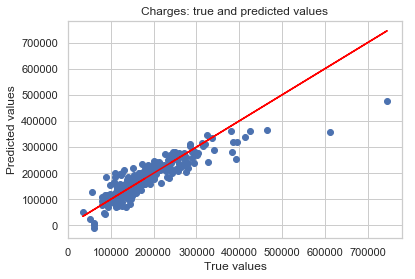

In [109]:
plt.scatter(y_test, y_preds_test)
plt.plot(y_test, y_test, color="red")
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.title("Charges: true and predicted values")
plt.show()

### LASSO

In [110]:
lasso_cv = LassoCV(alphas=alphas, cv=10)

lasso_cv.fit(X_train, y_train)

# We are making predictions here
y_preds_train = lasso_cv.predict(X_train)
y_preds_test = lasso_cv.predict(X_test)

print ('The best alpha value is:{}'.format(lasso_cv.alpha_))
print ('Training Statistics:')
print("R-squared : {}".format(lrm.score(X_train, y_train)))
print("                                                            ")
print('Testing Stastics:') 
print("R-squared: {}".format(lrm.score(X_test, y_test)))
print("MAE: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("MSE: {}".format(mse(y_test, y_preds_test)))
print("RMSE: {}".format(rmse(y_test, y_preds_test)))
print("MAPE: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

The best alpha value is:1e-10
Training Statistics:
R-squared : 0.7610270919050028
                                                            
Testing Stastics:
R-squared: 0.7779834879430915
MAE: 25480.630483457495
MSE: 1490553162.6181157
RMSE: 38607.68268904669
MAPE: 15.696481512933936


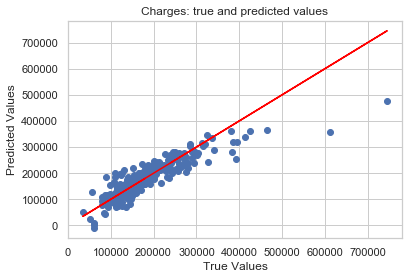

In [111]:
plt.scatter(y_test, y_preds_test)
plt.plot(y_test, y_test, color="red")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Charges: true and predicted values")
plt.show()

### RIDGE

In [134]:
ridge_cv = RidgeCV(alphas=alphas, cv=10)

ridge_cv.fit(X_train, y_train)

y_preds_train = ridge_cv.predict(X_train)
y_preds_test = ridge_cv.predict(X_test)

print ('The best alpha value is:{}'.format(ridge_cv.alpha_))
print ('Training Statistics:')
print("R-squared : {}".format(lrm.score(X_train, y_train)))
print("                                                            ")
print('Testing Stastics:') 
print("R-squared: {}".format(lrm.score(X_test, y_test)))
print("MAE: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("MSE: {}".format(mse(y_test, y_preds_test)))
print("RMSE: {}".format(rmse(y_test, y_preds_test)))
print("MAPE: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

The best alpha value is:100.0
Training Statistics:
R-squared : 0.7610270919050028
                                                            
Testing Stastics:
R-squared: 0.7779834879430915
MAE: 24602.73786339736
MSE: 1420616871.0885036
RMSE: 37691.07150358694
MAPE: 15.033325673873252


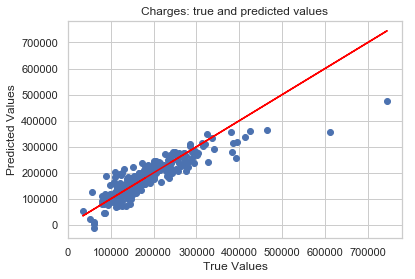

In [93]:
plt.scatter(y_test, y_preds_test)
plt.plot(y_test, y_test, color="red")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Charges: true and predicted values")
plt.show()

### ELASTIC NET

In [84]:
elasticnet_cv = ElasticNetCV(alphas=alphas, cv=5)

elasticnet_cv.fit(X_train, y_train)

y_preds_train = elasticnet_cv.predict(X_train)
y_preds_test = elasticnet_cv.predict(X_test)

print("The best alpha value is: {}".format(elasticnet_cv.alpha_))
print ('Training Statistics:')
print("Training R-squared : {}".format(lrm.score(X_train, y_train)))
print("                                                            ")
print('Testing Stastics:') 
print("Test R-squared: {}".format(lrm.score(X_test, y_test)))
print("MAE: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("MSE: {}".format(mse(y_test, y_preds_test)))
print("RMSE: {}".format(rmse(y_test, y_preds_test)))
print("MAPE: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

The best alpha value is: 1e-10
Training Statistics:
Training R-squared : 0.7613076878758055
                                                            
Testing Stastics:
Test R-squared: 0.7777310053126174
MAE: 25434.76232487801
MSE: 1492248256.2330651
RMSE: 38629.62925311431
MAPE: 15.627976239135851


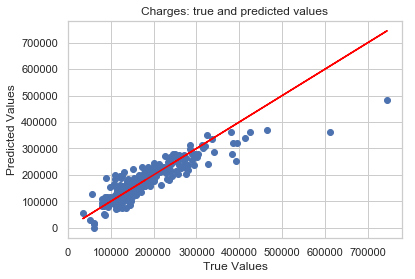

In [113]:
plt.scatter(y_test, y_preds_test)
plt.plot(y_test, y_test, color="red")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Charges: true and predicted values")
plt.show()

# Comparing the Models

In [114]:
SUMMARY_TABLE = pd.DataFrame(np.array([['OLS',0.7777310053126174,25434.76232561242,1492248256.284228,38629.62925377654,15.627976239703903], ['LASSO',0.7777310053126174,25434.76232561246,1492248256.284196,38629.62925377612,15.627976239704022], ['RIDGE',0.7777310053126174,24566.322262247566,1423817585.8627903,37733.507468333635,14.968693068021624],['ELASTIC NET',0.7777310053126174,25434.76232487801,1492248256.2330651,38629.62925311431,15.627976239135851]]),
                    columns=['Model', 'R-squared', 'MAE','MSE','RMSE','MAPE'])

In [121]:
SUMMARY_TABLE

,Model,R-squared,MAE,MSE,RMSE,MAPE
0,OLS,0.7777310053126174,25434.76232561242,1492248256.284228,38629.62925377654,15.627976239703903
1,LASSO,0.7777310053126174,25434.76232561246,1492248256.284196,38629.62925377612,15.627976239704022
2,RIDGE,0.7777310053126174,24566.322262247566,1423817585.8627903,37733.507468333635,14.968693068021624
3,ELASTIC NET,0.7777310053126174,25434.76232487801,1492248256.2330651,38629.62925311431,15.627976239135851


According to the table above, in terms of R-Squared the models are equal in their ability to explain the variance of the outcome variable with the dependent variables included. All the models have R-squared of about 0.8, which is pretty high meaning that the model is quite good at explaining variance of the outcome variable. The generalization gap is the same for all modesl. <br/>
In terms of the other measures however, the Elastic Net model preforms the best. 

# Adding External Variables

There are several factors that determine housing prices on the demand and supply side. These include Economic growth, Unemployment, Interest rates, Consumer confidence, Mortgage availability, Affordability/house prices to earnings and Speculative demand. On the supply side it is pretty much the number of housing units on the market. For the sake of this challenge I will only include two additional variables based on time and data availability. 

In [130]:
max = hpp4['yrsold'].max()
min = hpp4['yrsold'].min()

print('Year sold is an important variable in this case. The years in this data set range between {} and {}.'.format(min,max))
print('This is kind of interesting, because it includes 2008, the year of the financial crisis.')

Year sold is an important variable in this case. The years in this data set range between 2006 and 2010.
This is kind of interesting, because it includes 2008, the year of the financial crisis.


In [137]:
interest_rates=pd.DataFrame(np.array([[2006,6.41],[2007,6.34],[2008,6.03],[2009,5.04],[2010,4.69]]),columns=('Year','AVG_IR_%'))

In [138]:
interest_rates

,Year,AVG_IR_%
0,2006.0,6.41
1,2007.0,6.34
2,2008.0,6.03
3,2009.0,5.04
4,2010.0,4.69


In [140]:
hpp4.groupby('yrsold')['saleprice'].agg(np.mean)

yrsold
2006    182549.458599
2007    186063.151976
2008    177360.838816
2009    179432.103550
2010    177393.674286
Name: saleprice, dtype: float64

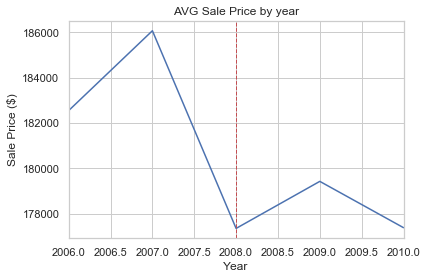

In [167]:
hpp4.groupby('yrsold')['saleprice'].agg(np.mean).plot()
plt.title('AVG Sale Price by year')
plt.xlabel("Year")
plt.ylabel("Sale Price ($)")
plt.axvline(x= 2008.0, color = 'r', linestyle = 'dashed', linewidth=1 )
plt.show()

In [145]:
hpp4.loc[hpp4['yrsold'] == 2006, 'IR'] = 6.41
hpp4.loc[hpp4['yrsold'] == 2007, 'IR'] = 6.34
hpp4.loc[hpp4['yrsold'] == 2008, 'IR'] = 6.03
hpp4.loc[hpp4['yrsold'] == 2009, 'IR'] = 5.04
hpp4.loc[hpp4['yrsold'] == 2010, 'IR'] = 4.69

In [146]:
hpp4.head()

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,bsmtfinsf2,bsmtunfsf,totalbsmtsf,firstflrsf,secondflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,totrmsabvgrd,fireplaces,garageyrblt,garagecars,garagearea,wooddecksf,openporchsf,enclosedporch,threessnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice,mszoning_FV,mszoning_RH,mszoning_RL,mszoning_RM,street_Pave,lotshape_IR2,lotshape_IR3,lotshape_Reg,landcontour_HLS,landcontour_Low,landcontour_Lvl,utilities_NoSeWa,lotconfig_CulDSac,lotconfig_FR2,lotconfig_FR3,lotconfig_Inside,landslope_Mod,landslope_Sev,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_IDOTRR,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,condition1_Feedr,condition1_Norm,condition1_PosA,condition1_PosN,condition1_RRAe,condition1_RRAn,condition1_RRNe,condition1_RRNn,condition2_Feedr,condition2_Norm,condition2_PosA,condition2_PosN,condition2_RRAe,condition2_RRAn,condition2_RRNn,bldgtype_2fmCon,bldgtype_Duplex,bldgtype_Twnhs,bldgtype_TwnhsE,housestyle_1.5Unf,housestyle_1Story,housestyle_2.5Fin,housestyle_2.5Unf,housestyle_2Story,housestyle_SFoyer,housestyle_SLvl,roofstyle_Gable,roofstyle_Gambrel,roofstyle_Hip,roofstyle_Mansard,roofstyle_Shed,roofmatl_CompShg,roofmatl_Membran,roofmatl_Metal,roofmatl_Roll,roofmatl_Tar&Grv,roofmatl_WdShake,roofmatl_WdShngl,exterior1st_AsphShn,exterior1st_BrkComm,exterior1st_BrkFace,exterior1st_CBlock,exterior1st_CemntBd,exterior1st_HdBoard,exterior1st_ImStucc,exterior1st_MetalSd,exterior1st_Plywood,exterior1st_Stone,exterior1st_Stucco,exterior1st_VinylSd,exterior1st_Wd Sdng,exterior1st_WdShing,exterior2nd_AsphShn,exterior2nd_Brk Cmn,exterior2nd_BrkFace,exterior2nd_CBlock,exterior2nd_CmentBd,exterior2nd_HdBoard,exterior2nd_ImStucc,exterior2nd_MetalSd,exterior2nd_Other,exterior2nd_Plywood,exterior2nd_Stone,exterior2nd_Stucco,exterior2nd_VinylSd,exterior2nd_Wd Sdng,exterior2nd_Wd Shng,masvnrtype_BrkFace,masvnrtype_None,masvnrtype_Stone,exterqual_Fa,exterqual_Gd,exterqual_TA,extercond_Fa,extercond_Gd,extercond_Po,extercond_TA,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,bsmtqual_Fa,bsmtqual_Gd,bsmtqual_TA,bsmtcond_Gd,bsmtcond_Po,bsmtcond_TA,bsmtexposure_Gd,bsmtexposure_Mn,bsmtexposure_No,bsmtfintype1_BLQ,bsmtfintype1_GLQ,bsmtfintype1_LwQ,bsmtfintype1_Rec,bsmtfintype1_Unf,bsmtfintype2_BLQ,bsmtfintype2_GLQ,bsmtfintype2_LwQ,bsmtfintype2_Rec,bsmtfintype2_Unf,heating_GasA,heating_GasW,heating_Grav,heating_OthW,heating_Wall,heatingqc_Fa,heatingqc_Gd,heatingqc_Po,heatingqc_TA,centralair_Y,electrical_FuseF,electrical_FuseP,electrical_Mix,electrical_SBrkr,kitchenqual_Fa,kitchenqual_Gd,kitchenqual_TA,functional_Maj2,functional_Min1,functional_Min2,functional_Mod,functional_Sev,functional_Typ,garagetype_Attchd,garagetype_Basment,garagetype_BuiltIn,garagetype_CarPort,garagetype_Detchd,garagefinish_RFn,garagefinish_Unf,garagequal_Fa,garagequal_Gd,garagequal_Po,garagequal_TA,garagecond_Fa,garagecond_Gd,garagecond_Po,garagecond_TA,paveddrive_P,paveddrive_Y,saletype_CWD,saletype_Con,saletype_ConLD,saletype_ConLI,saletype_ConLw,saletype_New,saletype_Oth,saletype_WD,salecondition_AdjLand,salecondition_Alloca,salecondition_Family,salecondition_Normal,salecondition_Partial,area,garage,area_qual,IR
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,

In [151]:
growth_rate=pd.DataFrame(np.array([[2006,2.59],[2007,1.97],[2008,-2.75],[2009,0.18],[2010,2.57]]),columns=('Year','Growth_Rate_%'))

In [152]:
growth_rate

,Year,Growth_Rate_%
0,2006.0,2.59
1,2007.0,1.97
2,2008.0,-2.75
3,2009.0,0.18
4,2010.0,2.57


In [153]:
hpp4.loc[hpp4['yrsold'] == 2006, 'GR'] = 2.59
hpp4.loc[hpp4['yrsold'] == 2007, 'GR'] = 1.97
hpp4.loc[hpp4['yrsold'] == 2008, 'GR'] = -2.75
hpp4.loc[hpp4['yrsold'] == 2009, 'GR'] = 0.18
hpp4.loc[hpp4['yrsold'] == 2010, 'GR'] = 2.57

In [154]:
hpp4.head()

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,bsmtfinsf2,bsmtunfsf,totalbsmtsf,firstflrsf,secondflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,totrmsabvgrd,fireplaces,garageyrblt,garagecars,garagearea,wooddecksf,openporchsf,enclosedporch,threessnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice,mszoning_FV,mszoning_RH,mszoning_RL,mszoning_RM,street_Pave,lotshape_IR2,lotshape_IR3,lotshape_Reg,landcontour_HLS,landcontour_Low,landcontour_Lvl,utilities_NoSeWa,lotconfig_CulDSac,lotconfig_FR2,lotconfig_FR3,lotconfig_Inside,landslope_Mod,landslope_Sev,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_IDOTRR,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,condition1_Feedr,condition1_Norm,condition1_PosA,condition1_PosN,condition1_RRAe,condition1_RRAn,condition1_RRNe,condition1_RRNn,condition2_Feedr,condition2_Norm,condition2_PosA,condition2_PosN,condition2_RRAe,condition2_RRAn,condition2_RRNn,bldgtype_2fmCon,bldgtype_Duplex,bldgtype_Twnhs,bldgtype_TwnhsE,housestyle_1.5Unf,housestyle_1Story,housestyle_2.5Fin,housestyle_2.5Unf,housestyle_2Story,housestyle_SFoyer,housestyle_SLvl,roofstyle_Gable,roofstyle_Gambrel,roofstyle_Hip,roofstyle_Mansard,roofstyle_Shed,roofmatl_CompShg,roofmatl_Membran,roofmatl_Metal,roofmatl_Roll,roofmatl_Tar&Grv,roofmatl_WdShake,roofmatl_WdShngl,exterior1st_AsphShn,exterior1st_BrkComm,exterior1st_BrkFace,exterior1st_CBlock,exterior1st_CemntBd,exterior1st_HdBoard,exterior1st_ImStucc,exterior1st_MetalSd,exterior1st_Plywood,exterior1st_Stone,exterior1st_Stucco,exterior1st_VinylSd,exterior1st_Wd Sdng,exterior1st_WdShing,exterior2nd_AsphShn,exterior2nd_Brk Cmn,exterior2nd_BrkFace,exterior2nd_CBlock,exterior2nd_CmentBd,exterior2nd_HdBoard,exterior2nd_ImStucc,exterior2nd_MetalSd,exterior2nd_Other,exterior2nd_Plywood,exterior2nd_Stone,exterior2nd_Stucco,exterior2nd_VinylSd,exterior2nd_Wd Sdng,exterior2nd_Wd Shng,masvnrtype_BrkFace,masvnrtype_None,masvnrtype_Stone,exterqual_Fa,exterqual_Gd,exterqual_TA,extercond_Fa,extercond_Gd,extercond_Po,extercond_TA,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,bsmtqual_Fa,bsmtqual_Gd,bsmtqual_TA,bsmtcond_Gd,bsmtcond_Po,bsmtcond_TA,bsmtexposure_Gd,bsmtexposure_Mn,bsmtexposure_No,bsmtfintype1_BLQ,bsmtfintype1_GLQ,bsmtfintype1_LwQ,bsmtfintype1_Rec,bsmtfintype1_Unf,bsmtfintype2_BLQ,bsmtfintype2_GLQ,bsmtfintype2_LwQ,bsmtfintype2_Rec,bsmtfintype2_Unf,heating_GasA,heating_GasW,heating_Grav,heating_OthW,heating_Wall,heatingqc_Fa,heatingqc_Gd,heatingqc_Po,heatingqc_TA,centralair_Y,electrical_FuseF,electrical_FuseP,electrical_Mix,electrical_SBrkr,kitchenqual_Fa,kitchenqual_Gd,kitchenqual_TA,functional_Maj2,functional_Min1,functional_Min2,functional_Mod,functional_Sev,functional_Typ,garagetype_Attchd,garagetype_Basment,garagetype_BuiltIn,garagetype_CarPort,garagetype_Detchd,garagefinish_RFn,garagefinish_Unf,garagequal_Fa,garagequal_Gd,garagequal_Po,garagequal_TA,garagecond_Fa,garagecond_Gd,garagecond_Po,garagecond_TA,paveddrive_P,paveddrive_Y,saletype_CWD,saletype_Con,saletype_ConLD,saletype_ConLI,saletype_ConLw,saletype_New,saletype_Oth,saletype_WD,salecondition_AdjLand,salecondition_Alloca,salecondition_Family,salecondition_Normal,salecondition_Partial,area,garage,area_qual,IR,GR
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0

In [155]:
# Y is the target variable which is the sale price
Y2 = hpp4['saleprice']

# X is the feature set of all the most correlated variables, as well as new the engineered features
X2 = hpp4[['overallqual','area_qual','grlivarea','garagecars','area','garage','garagearea','firstflrsf','IR','GR']]

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X2, Y2, test_size = 0.2, random_state = 465)

print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

The number of observations in training set is 1168
The number of observations in test set is 292


### OLS

In [157]:
lrm = LinearRegression()

lrm.fit(X_train, y_train)

y_preds_train = lrm.predict(X_train)
y_preds_test = lrm.predict(X_test)

print ('Training Statistics:')
print("R-squared : {}".format(lrm.score(X_train, y_train)))
print("                                                            ")
print('Testing Stastics:') 
print("R-squared: {}".format(lrm.score(X_test, y_test)))
print("MAE: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("MSE: {}".format(mse(y_test, y_preds_test)))
print("RMSE: {}".format(rmse(y_test, y_preds_test)))
print("MAPE: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

Training Statistics:
R-squared : 0.7610891516873434
                                                            
Testing Stastics:
R-squared: 0.777862746807678
MAE: 25525.26113215631
MSE: 1491363782.8714569
RMSE: 38618.17943496892
MAPE: 15.737874131620158


### LASSO

In [158]:
lasso_cv = LassoCV(alphas=alphas, cv=10)

lasso_cv.fit(X_train, y_train)

# We are making predictions here
y_preds_train = lasso_cv.predict(X_train)
y_preds_test = lasso_cv.predict(X_test)

print ('The best alpha value is:{}'.format(lasso_cv.alpha_))
print ('Training Statistics:')
print("R-squared : {}".format(lrm.score(X_train, y_train)))
print("                                                            ")
print('Testing Stastics:') 
print("R-squared: {}".format(lrm.score(X_test, y_test)))
print("MAE: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("MSE: {}".format(mse(y_test, y_preds_test)))
print("RMSE: {}".format(rmse(y_test, y_preds_test)))
print("MAPE: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

The best alpha value is:1e-09
Training Statistics:
R-squared : 0.7610891516873434
                                                            
Testing Stastics:
R-squared: 0.777862746807678
MAE: 25525.261132155636
MSE: 1491363782.8713896
RMSE: 38618.17943496806
MAPE: 15.737874131619664


### RIDGE

In [159]:
ridge_cv = RidgeCV(alphas=alphas, cv=10)

ridge_cv.fit(X_train, y_train)

y_preds_train = ridge_cv.predict(X_train)
y_preds_test = ridge_cv.predict(X_test)

print ('The best alpha value is:{}'.format(ridge_cv.alpha_))
print ('Training Statistics:')
print("R-squared : {}".format(lrm.score(X_train, y_train)))
print("                                                            ")
print('Testing Stastics:') 
print("R-squared: {}".format(lrm.score(X_test, y_test)))
print("MAE: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("MSE: {}".format(mse(y_test, y_preds_test)))
print("RMSE: {}".format(rmse(y_test, y_preds_test)))
print("MAPE: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

The best alpha value is:100.0
Training Statistics:
R-squared : 0.7610891516873434
                                                            
Testing Stastics:
R-squared: 0.777862746807678
MAE: 24628.410994924285
MSE: 1419968442.6959496
RMSE: 37682.46863855856
MAPE: 15.064776595036683


### ELASTIC NET

In [160]:
elasticnet_cv = ElasticNetCV(alphas=alphas, cv=5)

elasticnet_cv.fit(X_train, y_train)

y_preds_train = elasticnet_cv.predict(X_train)
y_preds_test = elasticnet_cv.predict(X_test)

print("The best alpha value is: {}".format(elasticnet_cv.alpha_))
print ('Training Statistics:')
print("Training R-squared : {}".format(lrm.score(X_train, y_train)))
print("                                                            ")
print('Testing Stastics:') 
print("Test R-squared: {}".format(lrm.score(X_test, y_test)))
print("MAE: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("MSE: {}".format(mse(y_test, y_preds_test)))
print("RMSE: {}".format(rmse(y_test, y_preds_test)))
print("MAPE: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

The best alpha value is: 1e-10
Training Statistics:
Training R-squared : 0.7610891516873434
                                                            
Testing Stastics:
Test R-squared: 0.777862746807678
MAE: 25525.26113142274
MSE: 1491363782.81671
RMSE: 38618.179434260106
MAPE: 15.737874131079902


In [161]:
SUMMARY_TABLE1 = pd.DataFrame(np.array([['OLS',0.777862746807678, 25525.26113215631, 1491363782.8714569, 38618.17943496892
,15.737874131620158], ['LASSO',0.777862746807678, 25525.261132155636, 1491363782.8713896, 38618.17943496806, 15.737874131619664], ['RIDGE',0.777862746807678,24628.410994924285,1419968442.6959496,37682.46863855856,15.064776595036683],['ELASTIC NET',0.777862746807678,25525.26113142274,1491363782.81671,38618.179434260106,15.737874131079902]]),
                    columns=['Model', 'R-squared', 'MAE','MSE','RMSE','MAPE'])

In [162]:
SUMMARY_TABLE1

,Model,R-squared,MAE,MSE,RMSE,MAPE
0,OLS,0.777862746807678,25525.26113215631,1491363782.8714569,38618.17943496892,15.737874131620158
1,LASSO,0.777862746807678,25525.261132155636,1491363782.8713896,38618.17943496806,15.737874131619664
2,RIDGE,0.777862746807678,24628.410994924285,1419968442.6959496,37682.46863855856,15.064776595036683
3,ELASTIC NET,0.777862746807678,25525.26113142274,1491363782.81671,38618.179434260106,15.737874131079902


The generalization gap is the same for all. Similar to the models without IR and GR, Eleastic Net is the model that performs the best. 

# Comparing the Elastic Net for the model before and after adding IR and GR

In [163]:
SUMMARY_TABLE2 = pd.DataFrame(np.array([['ELASTIC NET',0.7777310053126174,25434.76232487801,1492248256.2330651,38629.62925311431,15.627976239135851],['ELASTIC NET (IR,GR)',0.777862746807678,25525.26113142274,1491363782.81671,38618.179434260106,15.737874131079902]]),
                    columns=['Model', 'R-squared', 'MAE','MSE','RMSE','MAPE'])

In [164]:
SUMMARY_TABLE2

,Model,R-squared,MAE,MSE,RMSE,MAPE
0,ELASTIC NET,0.7777310053126174,25434.76232487801,1492248256.2330651,38629.62925311431,15.627976239135851
1,"ELASTIC NET (IR,GR)",0.777862746807678,25525.26113142274,1491363782.81671,38618.179434260106,15.737874131079902


For every measure, except MAPE, the Elastic Net model performs better when IR and GR are included.